<a href="https://colab.research.google.com/github/adityasankalp/Ensemble_Techniques/blob/main/Ensemble_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
    # Import the releavant libraries
    import numpy as np
    import pandas as pd
    import tensorflow as tf
    import math as math
    import matplotlib.pyplot as plt

In [5]:
# Load the MNIST Data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [6]:
# Divide data into train,valid and test set
from sklearn.model_selection import train_test_split
train_1_X,test_X,train_1_Y,test_Y = train_test_split(mnist['data'],mnist['target'],test_size = 10000,random_state = 20)
train_X,valid_X,train_Y,valid_Y = train_test_split(train_1_X,train_1_Y,test_size = 10000,random_state = 20)

In [7]:
#Check size of data

#Training data

print("Training Data_features",train_X.shape)
print("Training Data_target",train_Y.shape)
print("Valid Data_features",valid_X.shape)
print("Valid Data_target",valid_Y.shape)
print("Test Data_features",test_X.shape)
print("Test Data_target",test_Y.shape)

Training Data_features (50000, 784)
Training Data_target (50000,)
Valid Data_features (10000, 784)
Valid Data_target (10000,)
Test Data_features (10000, 784)
Test Data_target (10000,)


45782
target_variable 2


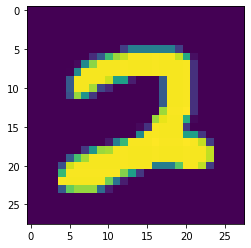

In [8]:
# view a sample image

x = np.random.randint(0,50000)
print(x)
print("target_variable",train_Y[x])
t1 = train_X[x].reshape(28,28)
plt.imshow(t1)

In [9]:
# Standardize the features using standard scaler
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
train_x = scaled.fit_transform(train_X)

In [10]:
# Model train using Random forest
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
clf1.fit(train_x,train_Y)
clf1.score(scaled.transform(valid_X),valid_Y)

0.9687

In [11]:
# model train using Extratrees where for features threshold is chosen randomly
from sklearn.ensemble import ExtraTreesClassifier
clf2 = ExtraTreesClassifier()
clf2.fit(train_x,train_Y)
clf2.score(scaled.transform(valid_X),valid_Y)

0.9722

In [12]:
# Support Vector Model using One vs Rest strategy
from sklearn.svm import SVC
clf3= SVC()
clf3.fit(train_x,train_Y)
clf3.score(scaled.transform(valid_X),valid_Y)

0.9642

In [13]:
# get predictions from all three models
y1 = clf1.predict(scaled.transform(test_X))
y2 = clf2.predict(scaled.transform(test_X))
y3 = clf3.predict(scaled.transform(test_X))

#y4 = 

In [14]:
# Hard voting by getting the mode of the three model predictions
from scipy import stats
y4 = np.vstack((y1,y2,y3))
y5 = stats.mode(y4).mode

In [15]:
# Hard voting improves the score
from sklearn.metrics import accuracy_score
print("Random Forest Accuracy",accuracy_score(y1,test_Y))
print("Extra Trees Accuracy",accuracy_score(y2,test_Y))
print("SVC Accuracy",accuracy_score(y3,test_Y))
print("Hard Voting Accuracy",accuracy_score(y5.T,test_Y))

Random Forest Accuracy 0.9685
Extra Trees Accuracy 0.9717
SVC Accuracy 0.9642
Hard Voting Accuracy 0.9734


In [ ]:
# Soft voting using mean of probabilities and then comparing with threshold 
from sklearn.ensemble import VotingClassifier
clf3_b = SVC(probability=True)
voting_clf = VotingClassifier(estimators=[('rf', clf1), 
                                          ('rt', clf2), ('svc', clf3_b)],
voting='soft')
voting_clf.fit(train_x, train_Y)

In [17]:
# Soft Voting performs better than hard voting
voting_clf.score(scaled.transform(test_X),test_Y)

0.9758

In [18]:
# Stacking 
y11 = clf1.predict(scaled.transform(valid_X))
y22 = clf2.predict(scaled.transform(valid_X))
y33 = clf3.predict(scaled.transform(valid_X))

y44 = np.vstack((y11,y22,y33)).T
clf_b = RandomForestClassifier()
clf_b.fit(y44,valid_Y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
# For Blender model Random Forest chosen
y11t = clf1.predict(scaled.transform(test_X))
y22t = clf2.predict(scaled.transform(test_X))
y33t = clf3.predict(scaled.transform(test_X))

y44t = np.vstack((y11t,y22t,y33t)).T
#y55t = clf_b.predict(y44t)


clf_b.score(y44t,test_Y)

0.9715